In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generamos de nuevo el dataset sintético
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, 
                           n_redundant=0, random_state=42)

# Dividimos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecimos
y_pred = clf.predict(X_test)

In [4]:
from sklearn.datasets import make_classification
import pandas as pd

# Creamos un dataset sintético con 1000 ejemplos, 10 variables (features) y 2 clases
X, y = make_classification(
    n_samples=1000,     # número de filas (ejemplos)
    n_features=10,      # número de columnas (variables)
    n_informative=5,    # número de variables realmente útiles
    n_redundant=2,      # número de variables redundantes
    n_classes=2,        # binario (0 o 1)
    random_state=42
)

# Convertimos a DataFrame para manejarlo más fácil
df = pd.DataFrame(X, columns=[f"var_{i}" for i in range(10)])
df["target"] = y

print(df.head())

      var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0  1.125100  1.178124  0.493516  0.790880 -0.614278  1.347020  1.419515   
1 -0.564641  3.638629 -1.522415 -1.541705  1.616697  4.781310  3.190292   
2  0.516313  2.165426 -0.628486 -0.386923  0.492518  1.442381  1.332905   
3  0.537282  0.966618 -0.115420  0.670755 -0.958516  0.871440  0.508186   
4  0.278385  1.065828 -1.724917 -2.235667  0.715107  0.731249 -0.674119   

      var_7     var_8     var_9  target  
0  1.357325  0.966041 -1.981139       1  
1 -0.890254  1.438826 -3.828748       0  
2 -1.958175 -0.348803 -1.804124       0  
3 -1.034471 -1.654176 -1.910503       1  
4  0.598330 -0.524283  1.047610       0  


In [6]:
from sklearn.model_selection import train_test_split

# Separamos variables independientes (X) y dependiente (y)
X = df.drop("target", axis=1)
y = df["target"]

# Dividimos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Creamos el modelo
modelo = RandomForestClassifier(random_state=42)

# Entrenamos
modelo.fit(X_train, y_train)

# Predecimos con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Mostramos resultados
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       112
           1       0.92      0.94      0.93        88

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



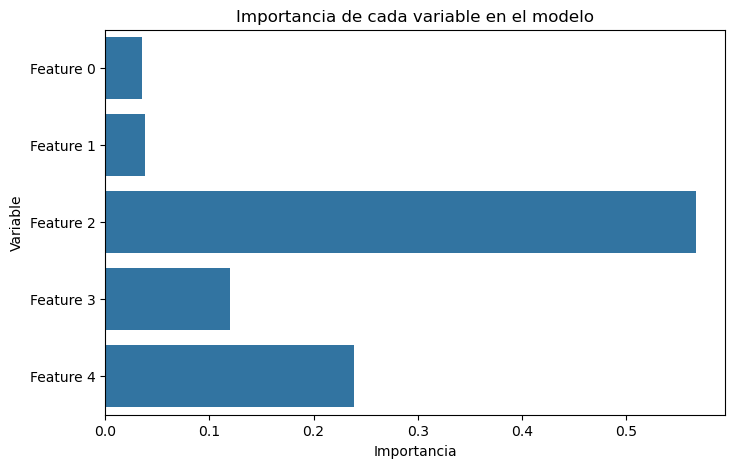

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importancias de las variables
importances = clf.feature_importances_

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=[f"Feature {i}" for i in range(X.shape[1])])
plt.title("Importancia de cada variable en el modelo")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

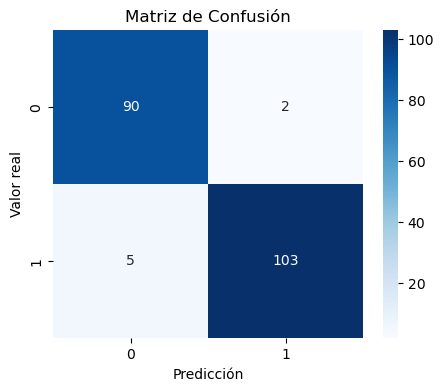

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()